# Análisis de filtros

En este cuaderno, se le proporciona una función que implementa un filtro digital (sistema LTI), es decir se le proporcionan las muestras de la señal de entrada y devuelve las muetras de la señal de salida.

Usando el procedimiento visto en la práctica de ir introduciendo sinusoides y comparar la amplitud de entrada con la de la salida, tiene que determinar el módulo de la respuesta en frecuencia del sistema dado.




In [3]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math
import cmath

import warnings
warnings.filterwarnings('ignore')


# Definición del sistema del que se quiere medir la respuesta en frecuencia

In [22]:
def sistema1(x):
    h1=np.ones(7)/7
    h2=np.ones(3)/3
    y=np.convolve(x,h1,'same')
    y=np.convolve(y,h2,'same')
    return y

def sistema2(x):
    h1=np.ones(7)/7
    h2=np.ones(7)/7
    h2[::2] *= -1.0
    y1=np.convolve(x,h1,'same')
    y2=np.convolve(x,h2,'same')
    return y1+y2
    

## Función que calcula la respuesta en frecuencia a una cierta frecuencia

Programe una función que reciba como argumentos:
* Un sistema
* Una frecuencia
y devuelva la ganancia en amplitud del sistema a esa frecuencia

La función debe 
* generar internamente un coseno suficientemente largo (100000 muestras) de la frecuencia dada.
* introducir la sinusoide en el sistema
* Determinar la amplitud de la sinusoide de salida
* Determinar el cociente entre la amplitud de salida y la de entrada

**IMPORTANTE: Probablemente deba distibuir el caso de que la frecuencia sea cero del resto**


In [23]:
def respuesta_1_frecuencia(sistema,frec):
    '''
    Calcula la ganancia en amplitud del sistema a la frecuencia frec
    '''
    n=np.arange(100000)
    ### BEGIN SOLUTION
    x=np.cos(2*np.pi*frec*n)
    y=sistema(x)

    Py=np.mean(y**2)
    if frec !=0:
        G= math.sqrt(2*Py)
    else:
        G=np.mean(y)
    
    ### END SOLUTION
    return G



In [27]:
### BEGIN TESTS
frec1=0.1
H01=respuesta_1_frecuencia(sistema1,frec1)
print(f'Ganancia a la frec={frec1} ---> {H01}')
assert abs(H01-0.326381) < 1e-3, "No ha calculado bien la respuesta en frecuencia"

frec2=0.2
H02=respuesta_1_frecuencia(sistema1,frec2)
print(f'Ganancia a la frec={frec2} ---> {H02}')
assert abs(H02-0.124665) < 1e-3,  "No ha calculado bien la respuesta en frecuencia"

frec3=0.
H03=respuesta_1_frecuencia(sistema1,frec3)
print(f'Ganancia a la frec={frec3} ---> {H03}')
assert abs(H03-1.0) < 1e-3,  "No ha calculado bien la respuesta en frecuencia para la frecuencia CERO"
### END TESTS

### BEGIN HIDDEN TESTS

frec2=0.
H02=respuesta_1_frecuencia(sistema1,frec2)
print(f'Ganancia a la frec={frec2} ---> {H02}')
assert abs(H02-1.0) < 1e-3,  "No ha calculado bien la respuesta en frecuencia"

frec2=0.
H02=respuesta_1_frecuencia(sistema2,frec2)
print(f'Ganancia a la frec={frec2} ---> {H02}')
assert abs(H02-0.85713) < 1e-3,  "No ha calculado bien la respuesta en frecuencia"

frec2=0.25
H02=respuesta_1_frecuencia(sistema2,frec2)
print(f'Ganancia a la frec={frec2} ---> {H02}')
assert abs(H02-0.28570857)< 1e-3, "No ha calculado bien la respuesta en frecuencia"
### END HIDDEN TESTS

Ganancia a la frec=0.1 ---> 0.32638186329022
Ganancia a la frec=0.2 ---> 0.12466595727882274
Ganancia a la frec=0.0 ---> 0.9999790476190474
Ganancia a la frec=0.0 ---> 0.9999790476190474
Ganancia a la frec=0.0 ---> 0.8571314285714289
Ganancia a la frec=0.25 ---> 0.2857085713714274


# Programar una función que calcule la respuesta en frecuencia en un conjunto de frecuencias

Llamando a la función anterior programe una función que reciba como entrada:

* Un sistema
* Un vector de frecuencias (array de numpy)

y devuelva **un array de numpy** con los valores de la ganancia en amplitud para cada una de las frecuencias

In [30]:
def respuesta_en_frecuencia(sistema,frecuencias):
    H=[]
    ### BEGIN SOLUTION
    for f in frecuencias:
        H.append(respuesta_1_frecuencia(sistema,f))
    ### END SOLUTION
    H= np.array(H)
    return H

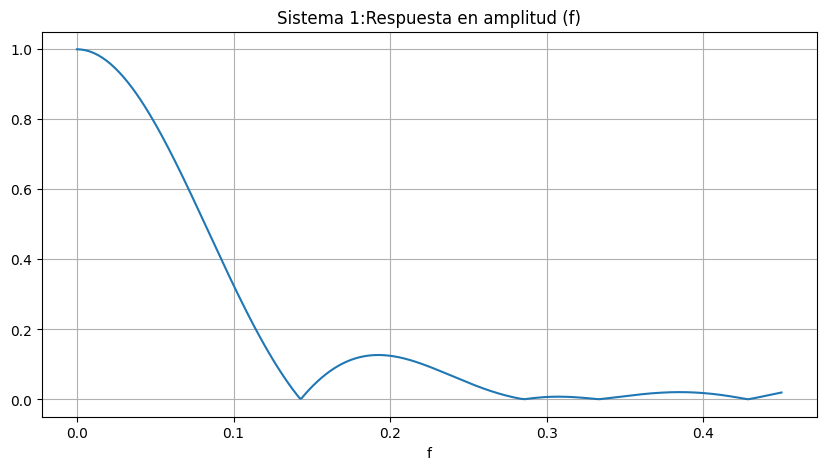

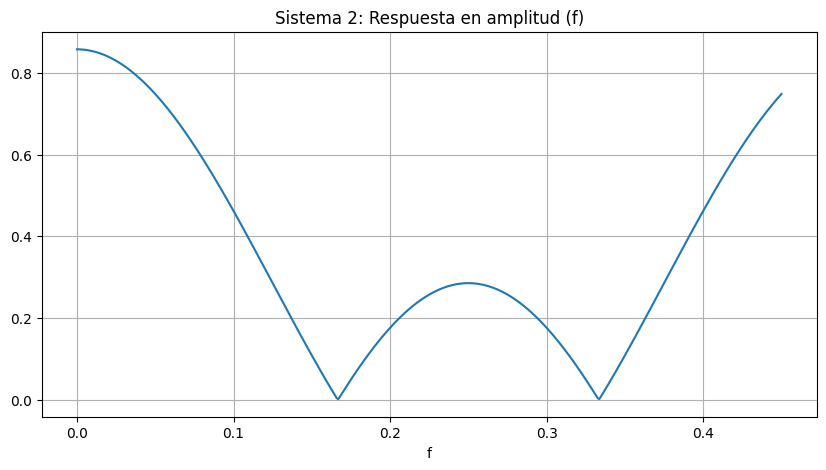

In [48]:
### BEGIN TESTS
frecs=np.linspace(0,0.45,500)
H=respuesta_en_frecuencia(sistema1,frecs)

assert isinstance(H,np.ndarray), "Su función debe devolver un array de numpy"
assert len(H) == len(frecs), "La cantidad de elementos del array de salida debe coincidir con la cantidad de frecs"
assert abs(np.sum(H) - 103.7560) < 0.1, "Los valores devueltos no son correctos"

_=plt.plot(frecs,H)
_=plt.grid()
_=plt.title('Sistema 1:Respuesta en amplitud (f)')
_=plt.xlabel('f')

_=plt.figure()
frecs=np.linspace(0,0.45,500)
H=respuesta_en_frecuencia(sistema2,frecs)
_=plt.plot(frecs,H)
_=plt.grid()
_=plt.title('Sistema 2: Respuesta en amplitud (f)')
_=plt.xlabel('f')



### END TESTS

### BEGIN HIDDEN TESTS
# HH=-H[::-1]
# np.save('data',HH)
frecs=np.linspace(0,0.45,500)
H=respuesta_en_frecuencia(sistema2,frecs)
HH=np.load('data.npy')
HH=-HH[::-1]
assert len(H)==len(HH)
dif=np.max(np.abs(H-HH)) 
assert dif < 1e-3
### END HIDDEN TESTS

La primera gráfica de la celda anterior debe ser como:

![sistema1](images/sistema1.png "Respuesta en frecuencia sistema 1")